##Python_Notebook_2: Classification Modelling and Hyperparameters Tuning

#Student Name :- Dunuhinga Wihanga
#UoW ID :-w2052079
#IIT ID :- 20231250

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tutorial 01 - Python Lab Seminar 01- Part (C)

In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


Tutorial 01 - Python Lab Seminar 01- Part (C)

In [ ]:
#Load Preprocessed Classification Dataset from Notebook 1
df = pd.read_csv('/content/drive/MyDrive/Final CourseWork/Classification_Dataset.csv')

Tutorial 02 - Part 01 - C - Partitioning the data into Training and Test sets

In [ ]:
#Define Features and Target
X = df.drop(columns=['Mortality_Status'])
print(X.columns.tolist())
y = df['Mortality_Status']

['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']


Tutorial 02 - Part 01 - C - Partitioning the data into Training and Test sets

In [ ]:
#Train-Test Split (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2646, 13)
Test shape: (1134, 13)


Tutorial 02 - Part 01 - C - Partitioning the data into Training and Test sets

In [ ]:
# Display class distribution in the training and test sets
print(f"Training Set Distribution :- ")
print(f"Alive :- {y_train.value_counts()[0]} samples")
print(f"Dead :- {y_train.value_counts()[1]} samples")

print(f"\nTest Set Distribution:")
print(f"Alive :- {y_test.value_counts()[0]} samples")
print(f"Dead :- {y_test.value_counts()[1]} samples")

Training Set Distribution :- 
Alive :- 2267 samples
Dead :- 379 samples

Test Set Distribution:
Alive :- 972 samples
Dead :- 162 samples


## Logistic Regression

Tutorial 02 - Part 03 - 5 - Instantiate the Model

In [ ]:
#Instantiate and Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

Tutorial 02 - Part 03 - 6 - Predicted Values

In [ ]:
#To see the predicted values
y_pred_logreg
Comparison_df = pd.DataFrame({'Actual Mortality Status' : y_test,'Predicted Status' : y_pred_logreg})
Comparison_df

,Actual Mortality Status,Predicted Status
875,1,1
1427,0,0
3164,0,0
1095,1,0
2216,0,0
...,...,...
3447,0,0
3729,0,0
547,0,0
2278,0,0


Tutorial 02 - Part 03 - 7 - Model Evaluation using confusion matrix

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       972
           1       0.55      0.11      0.18       162

    accuracy                           0.86      1134
   macro avg       0.71      0.55      0.55      1134
weighted avg       0.82      0.86      0.82      1134



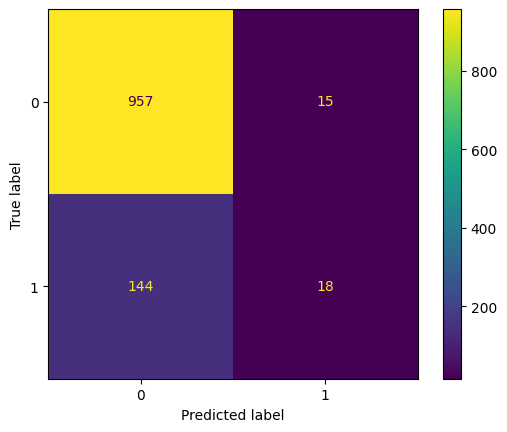

In [ ]:
#Evaluate Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

log_cm = confusion_matrix(y_test, y_pred_logreg, labels=logreg.classes_)
ConfusionMatrixDisplay(log_cm, display_labels=logreg.classes_).plot()

Tutorial 02 - Part 03 - 10 - ROC Curve

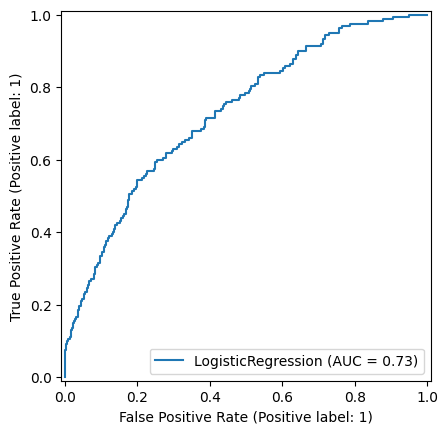

In [ ]:
#Plot ROC Curve for Logistic Regression
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

##Naïve Bayes (GaussianNB)

Tutorial 03 - Part B - Step 5 - Build a Naïve Bayes model

In [ ]:
#Train and Predict with Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

Tutorial 03 - Part B - Step 7 - Testing the Nb model

In [ ]:
#Create a dataframe for comparing the actual vs predicted results by Nb mode
compare_results_Nb_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_nb})
compare_results_Nb_df

,Actual,Predicted
875,1,1
1427,0,0
3164,0,0
1095,1,1
2216,0,0
...,...,...
3447,0,0
3729,0,0
547,0,0
2278,0,0


Tutorial 03 - Part B - Step 6 -  Evaluate your Naïve Bayes model

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       972
           1       0.30      0.38      0.34       162

    accuracy                           0.79      1134
   macro avg       0.60      0.62      0.60      1134
weighted avg       0.81      0.79      0.80      1134



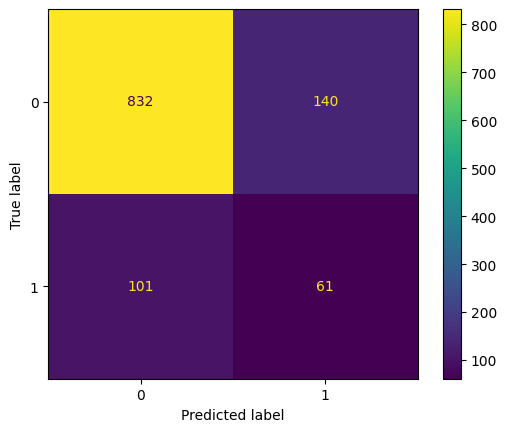

In [ ]:
#Evaluate Naive Bayes Model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

nb_cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
ConfusionMatrixDisplay(nb_cm, display_labels=nb.classes_).plot()

Tutorial 03 - Part B - Step 6 - ROC Curve

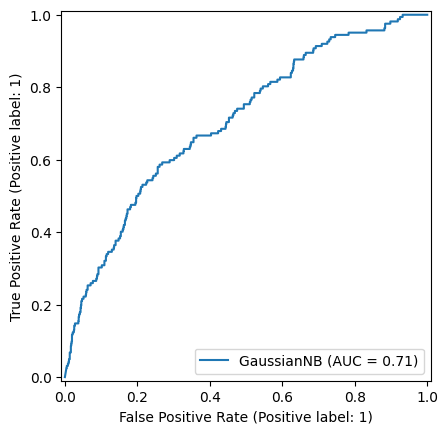

In [ ]:
#Plot ROC Curve for Naive Bayes
RocCurveDisplay.from_estimator(nb, X_test, y_test)

##k-Nearest Neighbours (KNN)

Tutorial 03 - Part A - Step 6 -  Building and training the kNN model

In [ ]:
#Train Initial kNN Model (k=9)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Tutorial 03 - Part A - Step 7 - Testing the kNN model

In [ ]:
#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_knn})
compare_results_knn_df

,Actual,Predicted
875,1,1
1427,0,0
3164,0,0
1095,1,0
2216,0,0
...,...,...
3447,0,0
3729,0,0
547,0,0
2278,0,0


Tutorial 03 - Part A - Step 8 - Evaluate the kNN model’s test results

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       972
           1       0.33      0.09      0.14       162

    accuracy                           0.84      1134
   macro avg       0.60      0.53      0.53      1134
weighted avg       0.79      0.84      0.80      1134



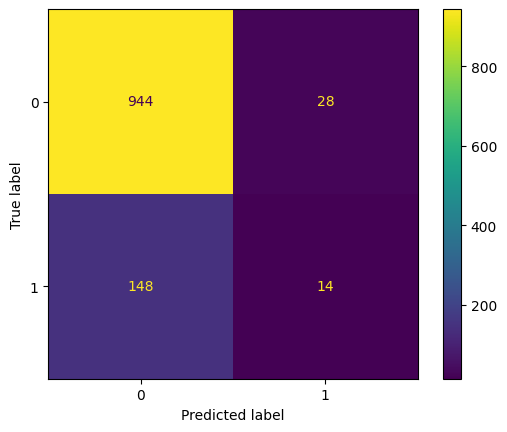

In [ ]:
#Evaluate Initial kNN Model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_).plot()

Tutorial 03 - Part A - Step 8 - ROC Curve

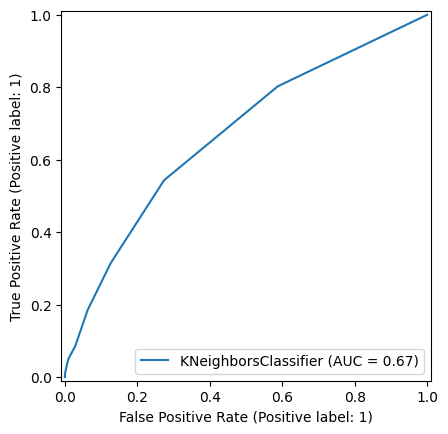

In [ ]:
#Plot ROC Curve for Initial KNN
RocCurveDisplay.from_estimator(knn, X_test, y_test)

##Hyperparameter Tuning for Nb (GridSearchCV)

Tutorial 03 - Part A - Step 10 - Improving the Nb model’s performance with Hyperparameter Tuning

In [ ]:
#Define parameter grid
param_grid_nb = {
    'var_smoothing': np.logspace(-12, -6, 7)
}

#Set up GridSearchCV
nb_base = GaussianNB()
grid_search_nb = GridSearchCV(nb_base, param_grid_nb, cv=5, scoring='f1_macro')
grid_search_nb.fit(X_train, y_train)

#Best hyperparameters
print("Best Params from GridSearch for GaussianNB:", grid_search_nb.best_params_)

Best Params from GridSearch for GaussianNB: {'var_smoothing': np.float64(1e-06)}


Tutorial 03 - Part A - Step 10 - Improving the Nb model’s performance with Hyperparameter Tuning

Tuned Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       972
           1       0.30      0.38      0.34       162

    accuracy                           0.79      1134
   macro avg       0.60      0.62      0.60      1134
weighted avg       0.81      0.79      0.80      1134



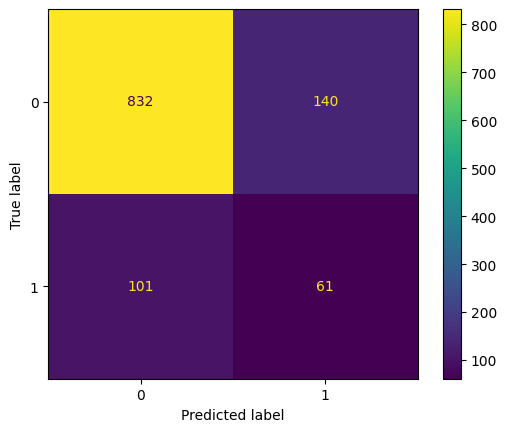

In [ ]:
# Evaluate Tuned Naive Bayes Model
best_nb = grid_search_nb.best_estimator_
y_pred_best_nb = best_nb.predict(X_test)

print("Tuned Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_best_nb))

cm_best_nb = confusion_matrix(y_test, y_pred_best_nb, labels=best_nb.classes_)
ConfusionMatrixDisplay(cm_best_nb, display_labels=best_nb.classes_).plot()

Tutorial 03 - Part A - Step 10 - Tuned ROC Curve

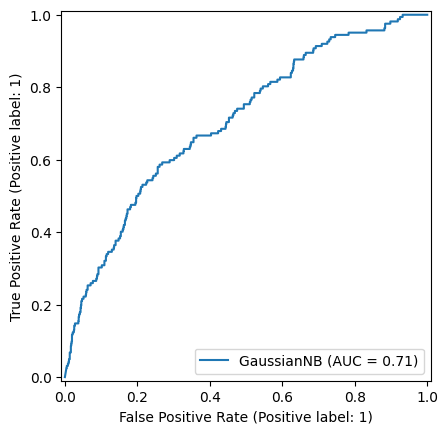

In [ ]:
#Plot ROC Curve for Tuned Nb
RocCurveDisplay.from_estimator(best_nb, X_test, y_test)

##Hyperparameter Tuning for LR (GridSearchCV)

Tutorial 03 - Part C - Step 10 - Improving the LR model’s performance with Hyperparameter Tuning

In [ ]:
#Hyperparameter Tuning for Logistic Regression (Best Model)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

lr_base = LogisticRegression(max_iter=1000)
grid_search_lr = GridSearchCV(lr_base, param_grid_lr, cv=5, scoring='f1_macro')
grid_search_lr.fit(X_train, y_train)
print("Best Params from GridSearch for Logistic Regression:", grid_search_lr.best_params_)

Best Params from GridSearch for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


Tutorial 03 - Part C - Step 10 - Improving the LR model’s performance with Hyperparameter Tuning & Tuned ROC Curve

Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       972
           1       0.55      0.11      0.18       162

    accuracy                           0.86      1134
   macro avg       0.71      0.55      0.55      1134
weighted avg       0.82      0.86      0.82      1134



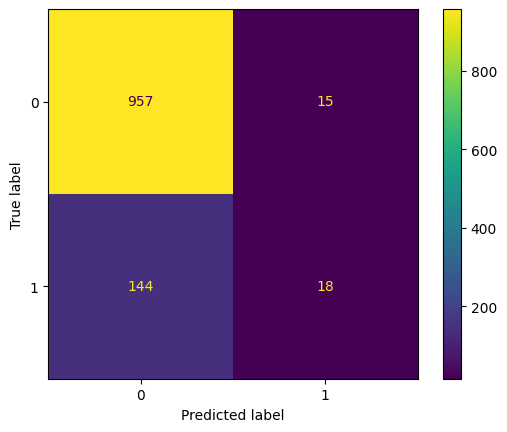

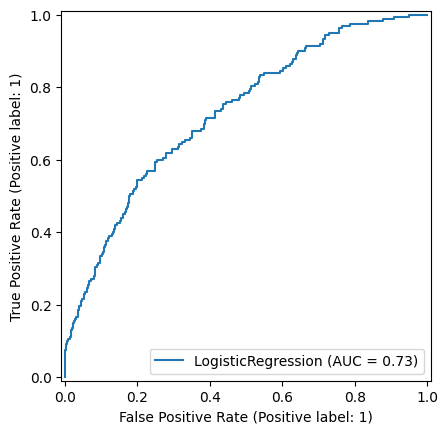

In [ ]:
#Evaluate Tuned Logistic Regression
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)

print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_lr))
cm_best_lr = confusion_matrix(y_test, y_pred_best_lr, labels=best_lr.classes_)
ConfusionMatrixDisplay(cm_best_lr, display_labels=best_lr.classes_).plot()
RocCurveDisplay.from_estimator(best_lr, X_test, y_test)